In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
path = '../Post-processing_Code/'
table_path = path + 'table.csv'

# Table resulting from `test_dnnmodelevaluation.m`

In [29]:
!head -2 $table_path

60,72.994916421026,88.1692815337864,65.3194604940904,16.1675581293746,27.5539850707282,10.4524671650904,33.7283973329553,134.311352842415,48.4748676018784,0.834902747813901,5.97805253937928
78.9473684210526,99.1630913171203,134.783007032506,81.3531334594272,22.3916700005964,31.6939802618744,17.7405148699574,63.9094690827586,200.817787748596,132.095609893931,2.36978926152061,14.0389232046855


In [30]:
df = pd.read_csv(table_path, header=None)

In [31]:
df.index = [
    'MinExact', 'MaxExact',
    'MeanExact', 'SDexact',
    'MinPredicted', 'MaxPredicted',
    'MeanPredicted', 'SDpredicted',
    'meanErrorMatrix', 'meanRelErrorMatrix',
    'SDErrorMatrix', 'CImin',
    'CImax',
]

In [32]:
df.columns = [
    'HR','SAPM','SAPS','SAPD',
    'PAPM','PAPS','PAPD','LVEF',
    'LVEDV', 'LVESV', 'CI', 'PCPW'
]

In [33]:
df

,HR,SAPM,SAPS,SAPD,PAPM,PAPS,PAPD,LVEF,LVEDV,LVESV,CI,PCPW
MinExact,60.000000,72.994916,88.169282,65.319460,16.167558,27.553985,10.452467,33.728397,134.311353,48.474868,0.834903,5.978053
MaxExact,78.947368,99.163091,134.783007,81.353133,22.391670,31.693980,17.740515,63.909469,200.817788,132.095610,2.369789,14.038923
MeanExact,66.690803,89.761288,119.935433,74.674216,18.420212,29.183551,13.038542,53.386333,157.226279,74.135618,-1.896979,9.000773
SDexact,3.868749,5.531779,9.699933,3.540327,1.188730,0.777338,1.397815,6.572160,14.552593,17.296881,0.317857,1.612277
MinPredicted,60.000000,71.855236,86.499266,63.049685,16.107994,27.530123,10.396930,31.888119,134.913627,49.088768,0.664930,5.911538
MaxPredicted,83.333333,99.517668,135.400786,81.576109,23.071332,32.126030,18.543983,63.776087,205.625197,137.997996,2.392823,14.921932
MeanPredicted,67.157644,89.251440,119.058501,74.347910,18.535196,29.256329,13.174630,52.602245,159.133315,76.422552,-1.863027,9.151575
SDpredicted,4.237192,6.058105,10.667908,3.849426,1.310199,0.852464,1.542436,7.100348,15.916491,19.045741,0.352372,1.772579
meanErrorMatrix,0.741699,0.630616,1.142273,0.424490,0.134262,0.113936,0.158571,0.876985,2.084429,2.484310,0.045700,0.177673
meanRelErrorMatrix,0.011040,0.007356,0.010137,0.005862,0.006980,0.003864,0.011380,0.017834,0.012714,0.030776,0.028169,0.017940


In [27]:
with open('result_table.csv', 'w') as f:
    f.write(df.to_csv())

# Data extraced by `test_dnnmodelevaluation.m`

## Load

In [34]:
# Exact
X = pd.read_csv(path + 'Xexact.csv')
# Pred
Xhat = pd.read_csv(path + 'Xpredicted.csv')

In [35]:
X.shape

(498, 12)

In [36]:
Xhat.shape

(498, 12)

In [37]:
cols = [
    'HR','SAPM','SAPS','SAPD',
    'PAPM','PAPS','PAPD','LVEF',
    'LVEDV', 'LVESV', 'CI', 'PCPW'
]
X.columns = cols
Xhat.columns = cols

In [41]:
X.head(5)

,HR,SAPM,SAPS,SAPD,PAPM,PAPS,PAPD,LVEF,LVEDV,LVESV,CI,PCPW
0,65.217391,92.609776,126.435978,75.696675,18.193093,29.000448,12.789416,54.782405,149.250685,67.487571,-2.197750,8.477912
1,62.500000,93.788953,126.441664,77.462598,17.356856,28.540265,11.765151,58.570209,148.720360,61.614534,-2.050838,7.613565
2,62.500000,94.978545,128.960053,77.987791,17.525749,28.486615,12.045316,53.208741,162.688402,76.123951,-2.205449,7.511583
3,62.500000,94.284163,129.071605,76.890443,17.937245,28.883103,12.464317,58.953981,141.170588,57.944907,-2.108881,8.070442
4,65.217391,91.929204,124.114741,75.836436,18.725529,29.305652,13.435467,49.588393,160.794592,81.059137,-1.938765,9.022220


## Apply relevant transformations

We want a positive value for the cardiac index.

In [91]:
X.CI = X.CI.apply(np.abs)
Xhat.CI = Xhat.CI.apply(np.abs)

## Describe

In [93]:
X.describe()

,HR,SAPM,SAPS,SAPD,PAPM,PAPS,PAPD,LVEF,LVEDV,LVESV,CI,PCPW
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,66.693762,89.753227,119.920677,74.669502,18.421528,29.184183,13.040201,53.368679,157.268897,74.181194,1.896650,9.002827
std,3.872074,5.534406,9.704078,3.542318,1.189561,0.777991,1.398730,6.566915,14.536022,17.284255,0.318092,1.613245
min,60.000000,72.994916,88.169282,65.319460,16.167558,27.553985,10.452467,33.728397,134.311353,48.474868,0.834903,5.978053
25%,65.217391,86.049526,113.226697,72.550906,17.568856,28.646326,12.047916,49.386038,145.702729,60.436289,1.687676,7.821762
50%,65.217391,91.151394,122.754415,75.407786,18.253413,29.114058,12.813105,54.649329,153.900372,70.307285,2.011676,8.710912
75%,68.181818,93.942914,127.435712,77.225945,19.079001,29.580276,13.845562,58.482541,166.469519,84.101762,2.140406,9.965368
max,78.947368,99.163091,134.783007,81.353133,22.391670,31.693980,17.740515,63.909469,200.817788,132.095610,2.369789,14.038923


In [94]:
Xhat.describe()

,HR,SAPM,SAPS,SAPD,PAPM,PAPS,PAPD,LVEF,LVEDV,LVESV,CI,PCPW
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,67.166997,89.242768,119.042090,74.343108,18.536694,29.257363,13.176359,52.583211,159.180586,76.472768,1.862653,9.153696
std,4.236293,6.061095,10.672328,3.851800,1.311089,0.853008,1.543502,7.094732,15.897393,19.031797,0.352627,1.773728
min,60.000000,71.855236,86.499266,63.049685,16.107994,27.530123,10.396930,31.888119,134.913627,49.088768,0.664930,5.911538
25%,65.217391,85.152279,111.893465,71.987752,17.614372,28.681808,12.077228,48.512786,146.187018,61.450746,1.654299,7.859051
50%,65.217391,90.689528,122.220326,75.089912,18.340226,29.177889,12.895268,53.908235,155.682488,71.685327,1.978183,8.795132
75%,68.181818,93.787393,127.359665,77.077118,19.268933,29.695800,14.077354,58.035717,169.575286,87.979951,2.134118,10.181599
max,83.333333,99.517668,135.400786,81.576109,23.071332,32.126030,18.543983,63.776087,205.625197,137.997996,2.392823,14.921932


## Plots predicted vs exact

In [84]:
def plt_var(df, dfhat, col, ax):
    # Scatter plot predicted vs exact
    ax.scatter(df[col], dfhat[col])
    # Plot identity line
    coord1 = min(df[col].min(), dfhat[col].min())
    coord2 = max(df[col].max(), dfhat[col].max())
    ax.plot([coord1, coord2], [coord1, coord2], '--r')
    ax.set_xlabel('${}$'.format(col))
    ax.set_ylabel('$\widehat{{ {} }}$'.format(col))
    ax.grid(ls='--')

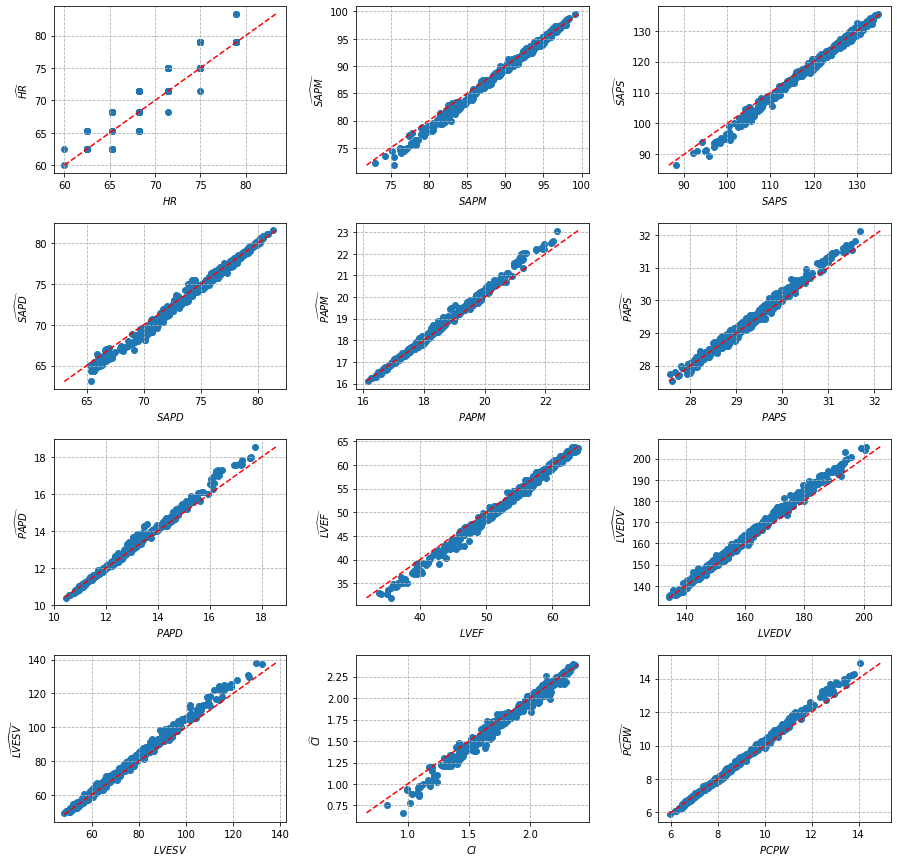

In [95]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
axlst = ax.ravel()

for i, col in enumerate(X.columns):
    plt_var(X, Xhat, col, axlst[i])
plt.subplots_adjust(wspace=.3, hspace=.3)